In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
# Read the csv file into a pandas DataFrame
season = pd.concat([pd.read_csv(f) for f in glob.glob('nhl_season_data/*.csv')], 
                             ignore_index = True)

season.head(20)

,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1,San Jose Sharks*,28.7,82,53,18,11,117,0.713,251,...,83.22,12,11,12.8,14.1,2720,9.2,2228,0.911,9
1,2,Boston Bruins*,28.4,82,53,19,10,116,0.707,270,...,82.35,8,7,12.5,12.8,2482,10.9,2524,0.925,7
2,3,Detroit Red Wings*,31.2,82,51,21,10,112,0.683,289,...,78.29,6,4,10.0,10.9,2965,9.7,2274,0.894,8
3,4,Washington Capitals*,27.2,82,50,24,8,108,0.659,268,...,80.62,7,11,12.7,11.4,2747,9.8,2418,0.901,2
4,5,New Jersey Devils*,30.3,82,51,27,4,106,0.646,238,...,79.94,12,4,12.9,13.1,2698,8.8,2415,0.914,7
5,6,Chicago Blackhawks*,25.9,82,46,24,12,104,0.634,260,...,80.61,10,6,14.1,15.2,2683,9.7,2344,0.911,6
6,7,Vancouver Canucks*,27.9,82,45,27,10,100,0.610,243,...,81.40,7,5,16.5,16.3,2335,10.4,2392,0.911,10
7,8,Pittsburgh Penguins*,26.6,82,45,28,9,99,0.604,258,...,82.71,7,13,13.6,14.2,2381,10.8,2484,0.906,4
8,9,Philadelphia Flyers*,27.0,82,44,27,11,99,0.604,260,...,82.95,16,1,17.5,14.8,2441,10.7,2668,0.913,3
9,10,Calgary Flames*,28.9,82,46,30,6,98,0.598,251,...,83.38,6,15,15.8,15.6,2643,9.5,2441,0.899,4


In [3]:
# Assign the data to X and y

X = nhl[["GF", "GA"]]
y = nhl["PTS"].values.reshape(-1, 1)
print(X.shape, y.shape)

(301, 2) (301, 1)


In [4]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [5]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [6]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9131762496406937
Testing Score: 0.8865241447837893


Text(0.5, 1.0, 'Residual Plot')

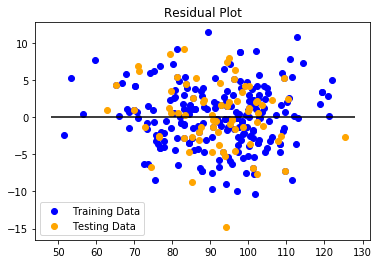

In [7]:
 # Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [8]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 18.614205227983813, R2: 0.8865241447837893
